<a href="https://colab.research.google.com/github/Vardhaaaan/Neural-networks-and-Deep-learning-/blob/main/Body_part_identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/8
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 332ms/step - accuracy: 0.8101 - loss: 0.5052 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/8
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 212ms/step - accuracy: 1.0000 - loss: 7.8219e-06 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/8
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 248ms/step - accuracy: 1.0000 - loss: 5.9076e-07 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/8
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 230ms/step - accuracy: 1.0000 - loss: 6.1453e-08 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/8
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 202ms/step - accuracy: 1.0000 - loss: 3.7821e-08 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/8
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 270ms/step - accuracy: 1.0000 - loss: 3.5058e-08 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/8
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 220ms/step - accuracy: 1.0000 - loss: 3.8526e-08 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/8
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 213ms/step - accura

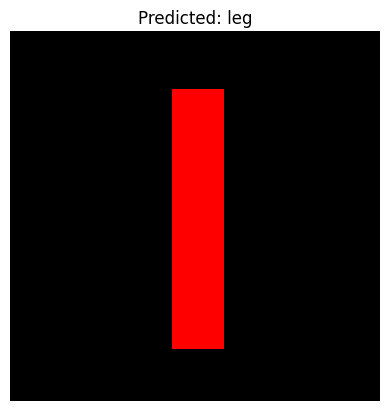

In [1]:
import os
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import random

# Settings
img_size = 64
samples_per_class = 200
classes = ['head', 'hand', 'leg', 'foot']
num_classes = len(classes)

# Create synthetic image function
def create_image(label):
    img = np.zeros((img_size, img_size, 3), dtype=np.uint8)

    if label == 0:  # head (circle)
        cv2.circle(img, (32, 32), 15, (255, 0, 0), -1)

    elif label == 1:  # hand (square)
        cv2.rectangle(img, (20, 20), (44, 44), (0, 255, 0), -1)

    elif label == 2:  # leg (vertical rectangle)
        cv2.rectangle(img, (28, 10), (36, 54), (0, 0, 255), -1)

    elif label == 3:  # foot (horizontal rectangle)
        cv2.rectangle(img, (15, 40), (50, 52), (255, 255, 0), -1)

    return img

# Generate dataset
X = []
y = []

for label in range(num_classes):
    for _ in range(samples_per_class):
        img = create_image(label)
        X.append(img)
        y.append(label)

X = np.array(X) / 255.0
y = tf.keras.utils.to_categorical(y, num_classes)

# Split data
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Build CNN
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(img_size, img_size, 3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train
model.fit(X_train, y_train, epochs=8, validation_data=(X_test, y_test))

# --------------------------
# Test on a new image
# --------------------------

# Create a random test image
test_label = random.randint(0, num_classes-1)
test_img = create_image(test_label)

# Prepare image for prediction
input_img = test_img / 255.0
input_img = np.expand_dims(input_img, axis=0)

# Predict
prediction = model.predict(input_img)
predicted_class = classes[np.argmax(prediction)]

# Show output image with predicted label
plt.imshow(cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB))
plt.title("Predicted: " + predicted_class)
plt.axis('off')
plt.show()


In [4]:
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Settings
img_size = 64
samples_per_class = 200
classes = ['head', 'hand', 'leg', 'foot']
num_classes = len(classes)

# Function to create synthetic images
def create_image(label):
    img = np.zeros((img_size, img_size, 3), dtype=np.uint8)

    if label == 0:  # head (circle)
        cv2.circle(img, (32, 32), 15, (255, 0, 0), -1)

    elif label == 1:  # hand (square)
        cv2.rectangle(img, (20, 20), (44, 44), (0, 255, 0), -1)

    elif label == 2:  # leg (vertical rectangle)
        cv2.rectangle(img, (28, 10), (36, 54), (0, 0, 255), -1)

    elif label == 3:  # foot (horizontal rectangle)
        cv2.rectangle(img, (15, 40), (50, 52), (255, 255, 0), -1)

    return img

# Generate dataset
X = []
y = []

for label in range(num_classes):
    for _ in range(samples_per_class):
        img = create_image(label)
        X.append(img)
        y.append(label)

X = np.array(X) / 255.0
y = tf.keras.utils.to_categorical(y, num_classes)

# Split data
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Build CNN
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(img_size, img_size, 3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train model
model.fit(X_train, y_train, epochs=8, validation_data=(X_test, y_test))

# -------------------------
# Load and predict your image
# -------------------------
image_path = "/mnt/data/Nose_4.jpg"   # your uploaded image
img = cv2.imread(image_path)

# Add a check for successful image loading
if img is None:
    print(f"Error: Could not load image from {image_path}. Please check the path and if the file exists.")
else:
    # Resize and normalize
    img_resized = cv2.resize(img, (img_size, img_size))
    img_norm = img_resized / 255.0
    img_input = np.expand_dims(img_norm, axis=0)

    # Predict
    prediction = model.predict(img_input)
    predicted_class = classes[np.argmax(prediction)]

    # Display result
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title("Predicted: " + predicted_class)
    plt.axis('off')
    plt.show()


Epoch 1/8
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 215ms/step - accuracy: 0.8590 - loss: 0.5265 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/8
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 226ms/step - accuracy: 1.0000 - loss: 3.9376e-08 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/8
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 219ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/8
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 207ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/8
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 282ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/8
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 209ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/8
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 211ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/8
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 289ms/step - accura

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 17.2 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


Saving Nose_4.jpg to Nose_4 (1).jpg
Uploaded: Nose_4 (1).jpg

0: 640x640 1 person, 470.9ms
Speed: 14.4ms preprocess, 470.9ms inference, 35.0ms postprocess per image at shape (1, 3, 640, 640)

Detected Body Keypoints:

Nose            : (70, 122)
Left Eye        : (94, 100)
Right Eye       : (46, 98)
Left Ear        : (119, 100)
Right Ear       : (13, 95)
Left Shoulder   : (117, 120)
Right Shoulder  : (4, 118)
Left Elbow      : (117, 116)
Right Elbow     : (5, 119)
Left Wrist      : (96, 109)
Right Wrist     : (27, 110)
Left Hip        : (86, 121)
Right Hip       : (20, 119)
Left Knee       : (82, 127)
Right Knee      : (26, 111)
Left Ankle      : (79, 118)
Right Ankle     : (61, 99)


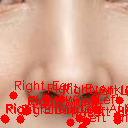

In [5]:
# ---------------- INSTALL DEPENDENCIES ----------------
!pip install ultralytics opencv-python

# ---------------- IMPORT LIBRARIES ----------------
import cv2
import numpy as np
from ultralytics import YOLO
from google.colab import files
from google.colab.patches import cv2_imshow

# ---------------- UPLOAD IMAGE ----------------
uploaded = files.upload()
if len(uploaded) == 0:
    raise Exception("Please upload an image.")

file_name = list(uploaded.keys())[0]
print("Uploaded:", file_name)

# ---------------- READ IMAGE ----------------
img = cv2.imread(file_name)
if img is None:
    raise Exception("Image not loaded correctly.")

# ---------------- LOAD MODEL ----------------
pose_model = YOLO("yolov8n-pose.pt")

# ---------------- PERFORM PREDICTION ----------------
output = pose_model.predict(source=img, conf=0.3)

# ---------------- BODY PART LABELS ----------------
labels = [
    "Nose",
    "Left Eye", "Right Eye",
    "Left Ear", "Right Ear",
    "Left Shoulder", "Right Shoulder",
    "Left Elbow", "Right Elbow",
    "Left Wrist", "Right Wrist",
    "Left Hip", "Right Hip",
    "Left Knee", "Right Knee",
    "Left Ankle", "Right Ankle"
]

# ---------------- PROCESS RESULTS ----------------
detected = False

for res in output:
    if res.keypoints is None:
        continue

    detected = True
    pts = res.keypoints.xy[0].cpu().numpy()

    print("\nDetected Body Keypoints:\n")

    for i, (px, py) in enumerate(pts):
        px, py = int(px), int(py)
        part = labels[i]

        print(f"{part:15} : ({px}, {py})")

        # Draw points
        cv2.circle(img, (px, py), 4, (0, 0, 255), -1)
        cv2.putText(img, part, (px, py - 6),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.4,
                    (0, 0, 255), 1)

if not detected:
    print("No person detected.")

# ---------------- DISPLAY OUTPUT ----------------
cv2_imshow(img)


Saving Hand_8.jpg to Hand_8.jpg
File uploaded: Hand_8.jpg

0: 640x640 1 person, 250.3ms
Speed: 8.7ms preprocess, 250.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

Detected Body Parts:

Nose            -> x:57, y:58
Left Eye        -> x:60, y:50
Right Eye       -> x:50, y:54
Left Ear        -> x:71, y:42
Right Ear       -> x:44, y:51
Left Shoulder   -> x:76, y:41
Right Shoulder  -> x:52, y:46
Left Elbow      -> x:83, y:32
Right Elbow     -> x:45, y:29
Left Wrist      -> x:80, y:39
Right Wrist     -> x:55, y:34
Left Hip        -> x:67, y:37
Right Hip       -> x:53, y:39
Left Knee       -> x:55, y:38
Right Knee      -> x:50, y:42
Left Ankle      -> x:66, y:55
Right Ankle     -> x:54, y:56


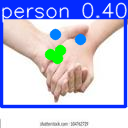

In [6]:
# ---------------- INSTALL DEPENDENCIES ----------------
!pip install ultralytics opencv-python

# ---------------- IMPORT LIBRARIES ----------------
import cv2
from ultralytics import YOLO
from google.colab import files
from google.colab.patches import cv2_imshow

# ---------------- UPLOAD IMAGE ----------------
uploaded = files.upload()
if len(uploaded) == 0:
    raise Exception("No image uploaded")

img_name = list(uploaded.keys())[0]
print("File uploaded:", img_name)

# ---------------- LOAD IMAGE ----------------
frame = cv2.imread(img_name)
if frame is None:
    raise Exception("Could not read the image")

# ---------------- LOAD YOLOv8 POSE MODEL ----------------
pose_net = YOLO("yolov8n-pose.pt")

# ---------------- RUN DETECTION ----------------
result = pose_net(frame)[0]   # take first result

# ---------------- PRINT KEYPOINT COORDINATES ----------------
body_parts = [
    "Nose",
    "Left Eye", "Right Eye",
    "Left Ear", "Right Ear",
    "Left Shoulder", "Right Shoulder",
    "Left Elbow", "Right Elbow",
    "Left Wrist", "Right Wrist",
    "Left Hip", "Right Hip",
    "Left Knee", "Right Knee",
    "Left Ankle", "Right Ankle"
]

if result.keypoints is not None:
    points = result.keypoints.xy[0].cpu().numpy()

    print("\nDetected Body Parts:\n")
    for i in range(len(points)):
        x, y = int(points[i][0]), int(points[i][1])
        print(f"{body_parts[i]:15} -> x:{x}, y:{y}")
else:
    print("No human detected")

# ---------------- DRAW USING YOLO BUILT-IN PLOT ----------------
output_img = result.plot()

# ---------------- DISPLAY RESULT ----------------
cv2_imshow(output_img)
